<a href="https://colab.research.google.com/github/jane95924/week4_ip/blob/master/week_4_ip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the libraries we will need.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#loading our autolib dataset
autolib = pd.read_csv('/content/autolib_daily_events_postal_code.csv')
autolib.head()


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [3]:
#loading our column explanation dataset
columns = pd.read_excel('/content/columns_explanation.xlsx')
columns.head()

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend


In [4]:
#getting the information about our autolib dataset
#to understand our data for analysis
autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [5]:
#checking our column explanation dataset
columns.count

<bound method DataFrame.count of                Column name                                        explanation
0              Postal code                 postal code of the area (in Paris)
1                     date                        date of the row aggregation
2      n_daily_data_points  number of daily data poinst that were availabl...
3                dayOfWeek     identifier of weekday (0: Monday -> 6: Sunday)
4                 day_type                                 weekday or weekend
5       BlueCars_taken_sum    Number of bluecars taken that date in that area
6    BlueCars_returned_sum  Number of bluecars returned that date in that ...
7         Utilib_taken_sum      Number of Utilib taken that date in that area
8      Utilib_returned_sum   Number of Utilib returned that date in that area
9      Utilib_14_taken_sum  Number of Utilib 1.4 taken that date in that area
10  Utilib_14_returned_sum  Number of Utilib 1.4 returned that date in tha...
11         Slots_freed_sum  Num

In [6]:
#counting our rows and columns in our autolib dataset
autolib.count

<bound method DataFrame.count of        Postal code       date  ...  Slots_freed_sum  Slots_taken_sum
0            75001   1/1/2018  ...               22               20
1            75001   1/2/2018  ...               23               22
2            75001   1/3/2018  ...               27               27
3            75001   1/4/2018  ...               25               21
4            75001   1/5/2018  ...               18               20
...            ...        ...  ...              ...              ...
16080        95880  6/15/2018  ...                0                0
16081        95880  6/16/2018  ...                0                0
16082        95880  6/17/2018  ...                0                0
16083        95880  6/18/2018  ...                0                0
16084        95880  6/19/2018  ...                0                0

[16085 rows x 13 columns]>

In [7]:
#checking  the shape of our autolib dataset
autolib.shape
#we have 13 columns and 16085 rows

(16085, 13)

In [8]:
autolib.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [ ]:
autolib.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

DATA CLEANING

In [9]:
#cleaning data using strip(),lower(), replace()
autolib.columns =autolib.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
autolib.columns.to_list()


['postal_code',
 'date',
 'n_daily_data_points',
 'dayofweek',
 'day_type',
 'bluecars_taken_sum',
 'bluecars_returned_sum',
 'utilib_taken_sum',
 'utilib_returned_sum',
 'utilib_14_taken_sum',
 'utilib_14_returned_sum',
 'slots_freed_sum',
 'slots_taken_sum']

In [10]:
#checking for missing values
autolib.isnull().sum()
#our data has no null values

postal_code               0
date                      0
n_daily_data_points       0
dayofweek                 0
day_type                  0
bluecars_taken_sum        0
bluecars_returned_sum     0
utilib_taken_sum          0
utilib_returned_sum       0
utilib_14_taken_sum       0
utilib_14_returned_sum    0
slots_freed_sum           0
slots_taken_sum           0
dtype: int64

In [11]:
autolib['postal_code'].nunique()
# we have 104 unique postal codes.

104

In [12]:
#checking for duplicates in our data.
autolib.duplicated().sum()
#we have no duplicates in the dataset

0

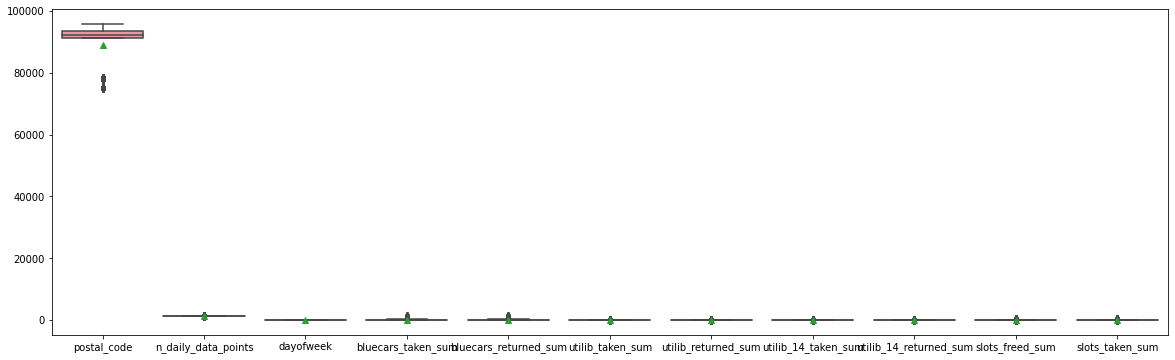

In [ ]:
# checking for outliers
plt.figure(figsize=(20,6))
sns.boxplot(data = autolib, showmeans = True)
#we have outliers in our dataset.
#  the cars were picked in different locations and many were returned. we are not going to get rid of the outliers

UNIVARIATE ANALYSIS


In [13]:
# dataset with the day type as week day and as a weekend
autolib_weekday=autolib[autolib['day_type']=='weekday']
autolib_weekend=autolib[autolib['day_type']=='weekend']

In [ ]:
#counting the weekend dataset
autolib_weekend.count()
#there are 4541 weekend days

postal_code               4541
date                      4541
n_daily_data_points       4541
dayofweek                 4541
day_type                  4541
bluecars_taken_sum        4541
bluecars_returned_sum     4541
utilib_taken_sum          4541
utilib_returned_sum       4541
utilib_14_taken_sum       4541
utilib_14_returned_sum    4541
slots_freed_sum           4541
slots_taken_sum           4541
dtype: int64

In [ ]:
#counting the weekday dataset
autolib_weekday.count()
# there are 11544 week days 


# from our analysis above, we have more week days working than the weekends

postal_code               11544
date                      11544
n_daily_data_points       11544
dayofweek                 11544
day_type                  11544
bluecars_taken_sum        11544
bluecars_returned_sum     11544
utilib_taken_sum          11544
utilib_returned_sum       11544
utilib_14_taken_sum       11544
utilib_14_returned_sum    11544
slots_freed_sum           11544
slots_taken_sum           11544
dtype: int64

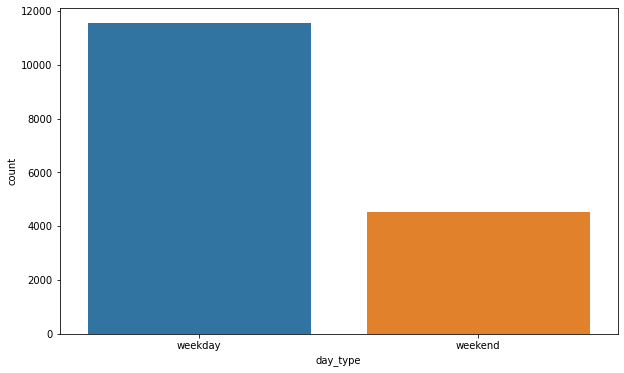

In [ ]:
#comparing the different type of days in a graph
plt.figure(figsize=(10, 6))
sns.countplot(autolib.day_type,order = autolib.day_type.value_counts().index)
# just as mentioned above , the number of week days is higher than the weekends for the car usage

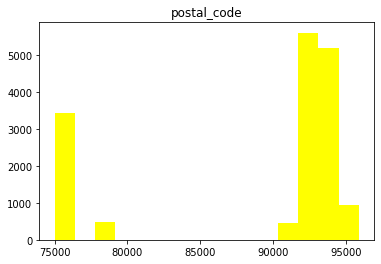

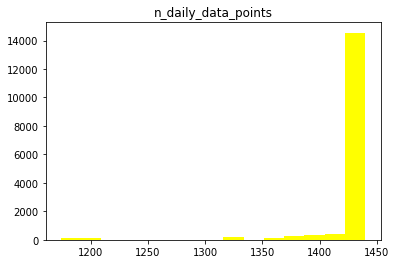

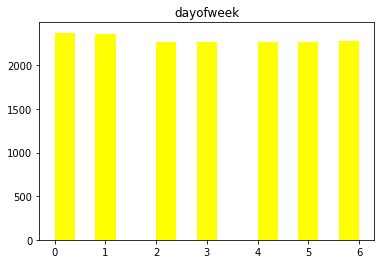

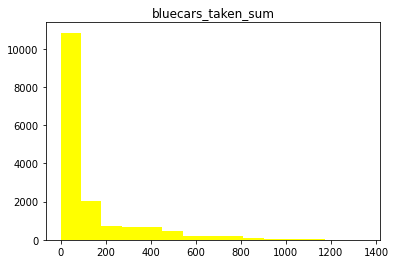

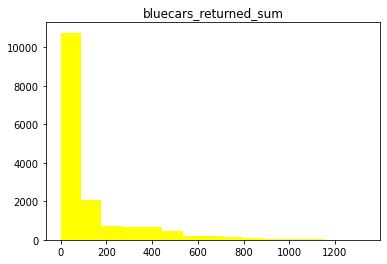

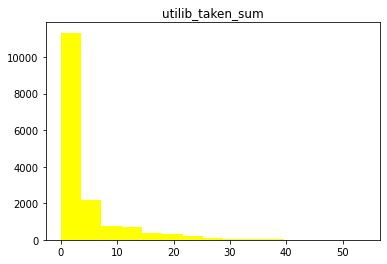

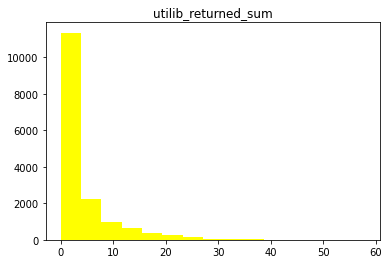

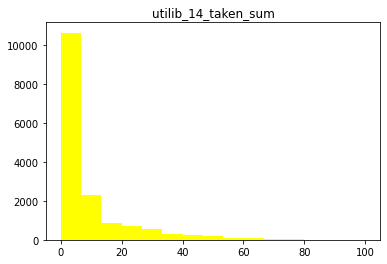

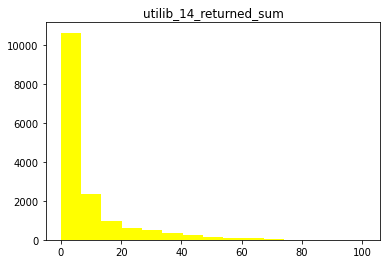

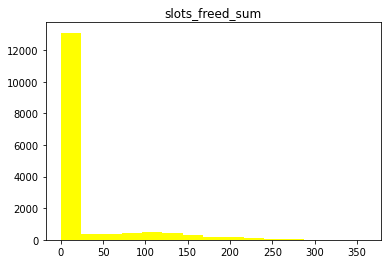

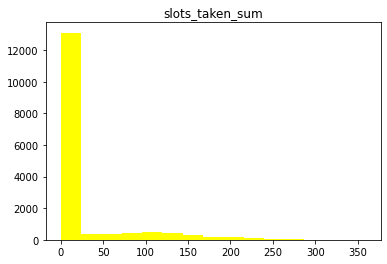

In [ ]:
#Numerical analysis
my_numerical_analysis = ['postal_code', 'n_daily_data_points', 'dayofweek',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum']
for col in my_numerical_analysis:
  plt.hist(autolib[col],bins=15,color="blue")
  plt.title(col)
  plt.show()

In [ ]:
autolib.describe(include='all')

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
count,16085.000000,16085,16085.000000,16085.000000,16085,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
unique,NaN,156,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,1/27/2018,NaN,NaN,weekday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,104,NaN,NaN,11544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,88791.293876,NaN,1431.330619,2.969599,NaN,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,NaN,33.212050,2.008378,NaN,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,NaN,1174.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,NaN,1439.000000,1.000000,NaN,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,NaN,1440.000000,3.000000,NaN,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,NaN,1440.000000,5.000000,NaN,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000


BIVARIATE ANALYSIS

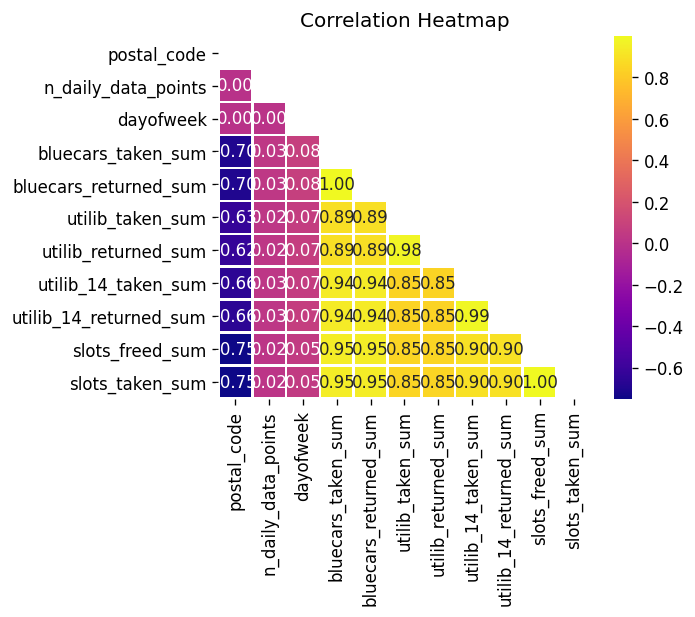

In [ ]:
# Correlation
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(autolib.corr(),dtype = bool))
sns.heatmap(autolib.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

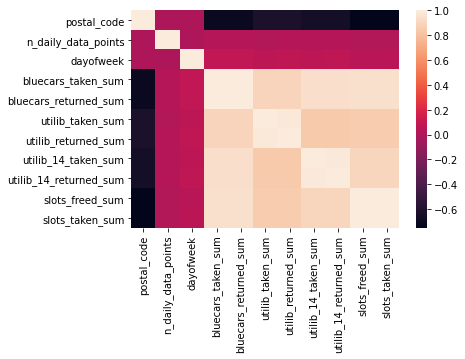

In [ ]:

df1 = autolib.corr()
sns.heatmap(df1)

SAMPLING 


In [14]:
# Simple Random Sampling 
weekend_sample =autolib_weekend.sample(n = 10, replace="False")
weekend_sample

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
8762,92390,2/11/2018,1440,6,weekend,12,13,0,0,3,2,2,2
12182,93400,6/10/2018,1440,6,weekend,133,141,3,4,14,13,0,0
14585,94300,3/4/2018,1440,6,weekend,100,84,4,4,3,3,0,0
828,75006,2/18/2018,1438,6,weekend,307,301,7,7,22,24,56,53
16054,95880,5/20/2018,1440,6,weekend,30,21,0,0,4,3,0,0
4519,92000,6/17/2018,1440,6,weekend,131,153,4,4,20,22,0,0
9147,92410,4/29/2018,1440,6,weekend,10,8,0,0,7,7,0,0
13325,94110,2/17/2018,1440,5,weekend,33,34,1,1,8,8,0,0
15540,94800,3/24/2018,1440,5,weekend,121,110,5,4,4,3,0,0
153,75001,6/17/2018,1440,6,weekend,175,174,7,7,8,9,20,20


In [15]:
#i would like to know more about the bluecars taken on the weekdays and the weekend.
autolib.groupby('day_type')['bluecars_taken_sum'].describe()
#the weekend mean is higher than the weekday mean, weekday = 116.028673 whereas the weekend = 151.090068
#standard deviation on the weekend is also higher than week day.
# on the quartile ranges, the weekend still has a higher value than weekday

,count,mean,std,min,25%,50%,75%,max
day_type,,,,,,,,
weekday,11544.0,116.028673,169.626905,0.0,18.0,42.0,126.0,1093.0
weekend,4541.0,151.090068,218.565642,0.0,25.0,59.0,156.0,1352.0


HYPOTHESIS TESTING.

In my analysis, i would like to know if the number of bluecars taken in area X have any difference with bluecars taken in area Y over the weekend.

H0 =  no of bluecars taken in area X >= the number of cars taken in area Y over the weekend

Ha = no of bluecars taken from area X < the no of bluecars taken in area Y over the weekend. 

our leveel of significance is 0.05

In [16]:
# we want to know about area Y and area X. our postal code is 75015 and 75017
# we filter our data to the postal code.
area_Y = autolib_weekend[autolib_weekend.postal_code == 75017]
area_Y.reset_index(inplace= True)

In [17]:
#we find the central tendencies of area_Y
area_Y.groupby('day_type')['bluecars_taken_sum'].describe()

,count,mean,std,min,25%,50%,75%,max
day_type,,,,,,,,
weekend,44.0,831.022727,159.843454,51.0,792.5,858.0,929.75,992.0


In [20]:
#confidence interval
# finding the standard error for the mean interval
error = 831.022727-(1.96*159.843454)
print(error)
p_error=831.022727+(1.96*159.843454)
print(p_error)
#we are 95% confident the mean is between 517.72955716 and 1144.31589684

517.72955716
1144.31589684


In [ ]:
#our area_X
area_X = autolib_weekend[autolib_weekend.postal_code == 75015]
area_X.reset_index(inplace= True)

In [ ]:
#we get their central tendencies
area_X.groupby('day_type')['bluecars_taken_sum'].describe()

# from the above analysis, area_X has a higher number of bluecars taken compared to area_Y
# it has a higher mean of 1072.772727 and area_Y = 831.022727

,count,mean,std,min,25%,50%,75%,max
day_type,,,,,,,,
weekend,44.0,1072.772727,211.909136,58.0,1001.75,1084.5,1169.5,1352.0


T test

the sample i am working with is less than 30 , i can use t test

In [ ]:
x = (1072.772727-1000)/211.909136

In [ ]:
y = (831.022727-1000)/159.843454

P Value

In [ ]:
from scipy import stats
from scipy.stats import norm

In [ ]:
#PValue
prob = stats.norm.cdf(x)
prob
# the P value is greater than the significance level, we fail to reject the null hypothesis

0.4958069905485386

In [ ]:
#P Value
prob = stats.norm.cdf(y)
prob
# the P V alue is greater than the significance level so we fail to reject the null hypothesis.

0.14522332941961386

CONCLUSION

In conclusion, we do not reject the null hypothesis, we agree that area X has more  bluecars taken than area Y over the weekend. this could be due to some assumptions,


1. people  run personal errands on the weekends mostly.
2. area x has a larger working population
3. most of the social activities take place in area X as compared to area Y

RECOMMENDATIONS

we would like to advise the company to have more bluecars available in area X. The company will gain more and increase their profit.